# Reading data

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("balanced_spam_data.csv", encoding = "ISO-8859-1")

In [3]:
data.tail(n=10)

Unnamed: 0                                                sms labels
2978        2304              Don I ' t think he has spatula hands!    ham
2979        1002  Todays numbers Voda ending 7548 selected are t...   spam
2980         563  SMS AUCTION You have won a Nokia 7250i. This i...   spam
2981         962  Valentines Day Special! Win over Ã¥ 1000 Â£ in...   spam
2982        2070  No i ' m not gonna be able to. | | too late no...    ham
2983        1302  8007 mob every week just txt NOKIA to 8007 txt...   spam
2984         675  SMS. ac Sptv: The New Jersey Devils and the De...   spam
2985         521  Urgent! Please call 0906346330. Your ABTA comp...   spam
2986         145  Urgent UR awarded a complimentary trip to Euro...   spam
2987        1967                               Where r we converge?    ham

In [4]:
data.shape

(2988, 3)

# Data Cleaning

In [5]:
import nltk
from nltk.tokenize import word_tokenize
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
stop_words = set(stopwords.words('english'))

In [6]:
data

Unnamed: 0                                                sms labels
0           1737  Good afternoon starshine! How's my boytoy? Doe...    ham
1           2339  My sis is catching e show in e afternoon so i'...    ham
2           1905                             What happened to date?    ham
3           1898                           K:)k.are you in college?    ham
4           2759                        S but mostly not like that.    ham
...          ...                                                ...    ...
2983        1302  8007 mob every week just txt NOKIA to 8007 txt...   spam
2984         675  SMS. ac Sptv: The New Jersey Devils and the De...   spam
2985         521  Urgent! Please call 0906346330. Your ABTA comp...   spam
2986         145  Urgent UR awarded a complimentary trip to Euro...   spam
2987        1967                               Where r we converge?    ham

[2988 rows x 3 columns]

In [7]:
columns_to_drop = ['Unnamed: 0']
data.drop(columns_to_drop,inplace=True, axis=1)

In [8]:
data

sms labels
0     Good afternoon starshine! How's my boytoy? Doe...    ham
1     My sis is catching e show in e afternoon so i'...    ham
2                                What happened to date?    ham
3                              K:)k.are you in college?    ham
4                           S but mostly not like that.    ham
...                                                 ...    ...
2983  8007 mob every week just txt NOKIA to 8007 txt...   spam
2984  SMS. ac Sptv: The New Jersey Devils and the De...   spam
2985  Urgent! Please call 0906346330. Your ABTA comp...   spam
2986  Urgent UR awarded a complimentary trip to Euro...   spam
2987                               Where r we converge?    ham

[2988 rows x 2 columns]

In [9]:
def clean_text(text):
    """
    To clean a textual data
    params: text : str
    return final_text : str
    """
    # remove punctuations from text
    punctuations_removed = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(punctuations_removed)
    # convert to lower case
    tokens = [w.lower() for w in tokens]
    # remove punctuation from each word
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    # filter out stop words
    words = [w for w in words if not w in stop_words]
    #stemming the tokens
    stemmed = [porter.stem(word) for word in words]
    final_text = ' '.join(stemmed)
    return final_text

In [10]:
data['sms'] = data['sms'].apply(clean_text)

In [11]:
data.shape

(2988, 2)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [13]:
X_train, X_test, y_train, y_test = train_test_split(data['sms'], data['labels'], test_size = 0.2, random_state = 2)

In [14]:
y_train.shape

(2390,)

In [15]:
X_test.shape

(598,)

In [16]:
x_test_list = X_test.tolist()
y_test_list = y_test.tolist()

In [17]:
Encoder = LabelEncoder()
y_train = Encoder.fit_transform(y_train)
y_test = Encoder.fit_transform(y_test)

# converting text to numerical representation


In [18]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(data['sms'])
X_train = Tfidf_vect.transform(X_train)
X_test = Tfidf_vect.transform(X_test)

## Visulaizing TFIDF 

In [19]:
terms = Tfidf_vect.get_feature_names()

In [20]:
# create a dataframe from a word matrix
def dtm2df(wm, feat_names):
    
    # create an index for each row
    doc_names = ['Doc{:d}'.format(idx) for idx, _ in enumerate(wm)]
    df = pd.DataFrame(data=wm.toarray(), index=doc_names,
                      columns=feat_names)
    return(df)

def idf2df(wm, feat_names):
  
    # create an index for each row
    doc_names = ['Doc{:d}'.format(idx) for idx, _ in enumerate(wm)]
    df = pd.DataFrame(data=wm, index=[0],
                      columns=feat_names)
    return(df)

In [21]:
df_tf_idf = dtm2df(X_test ,terms)

In [22]:
df_tf_idf

aah  aaooooright  aathi   ab  aberdeen  abi  abil  abiola  abj  abl  \
Doc0    0.0          0.0    0.0  0.0       0.0  0.0   0.0     0.0  0.0  0.0   
Doc1    0.0          0.0    0.0  0.0       0.0  0.0   0.0     0.0  0.0  0.0   
Doc2    0.0          0.0    0.0  0.0       0.0  0.0   0.0     0.0  0.0  0.0   
Doc3    0.0          0.0    0.0  0.0       0.0  0.0   0.0     0.0  0.0  0.0   
Doc4    0.0          0.0    0.0  0.0       0.0  0.0   0.0     0.0  0.0  0.0   
...     ...          ...    ...  ...       ...  ...   ...     ...  ...  ...   
Doc593  0.0          0.0    0.0  0.0       0.0  0.0   0.0     0.0  0.0  0.0   
Doc594  0.0          0.0    0.0  0.0       0.0  0.0   0.0     0.0  0.0  0.0   
Doc595  0.0          0.0    0.0  0.0       0.0  0.0   0.0     0.0  0.0  0.0   
Doc596  0.0          0.0    0.0  0.0       0.0  0.0   0.0     0.0  0.0  0.0   
Doc597  0.0          0.0    0.0  0.0       0.0  0.0   0.0     0.0  0.0  0.0   

        ...  yuo      yup  zac  zaher  zealand  zebra  zed  zoe  zoom  zouk  
Doc0    ...  0.0  0.00000  0.0    0.0      0.0    0.0  0.0  0.0   0.0   0.0  
Doc1    ...  0.0  0.00000  0.0    0.0      0.0    0.0  0.0  0.0   0.0   0.0  
Doc2    ...  0.0  0.00000  0.0    0.0      0.0    0.0  0.0  0.0   0.0   0.0  
Doc3    ...  0.0  0.00000  0.0    0.0      0.0    0.0  0.0  0.0   0.0   0.0  
Doc4    ...  0.0  0.00000  0.0    0.0      0.0    0.0  0.0  0.0   0.0   0.0  
...     ...  ...      ...  ...    ...      ...    ...  ...  ...   ...   ...  
Doc593  ...  0.0  0.00000  0.0    0.0      0.0    0.0  0.0  0.0   0.0   0.0  
Doc594  ...  0.0  0.44185  0.0    0.0      0.0    0.0  0.0  0.0   0.0   0.0  
Doc595  ...  0.0  0.00000  0.0    0.0      0.0    0.0  0.0  0.0   0.0   0.0  
Doc596  ...  0.0  0.00000  0.0    0.0      0.0    0.0  0.0  0.0   0.0   0.0  
Doc597  ...  0.0  0.00000  0.0    0.0      0.0    0.0  0.0  0.0   0.0   0.0  

[598 rows x 4540 columns]

In [23]:
transformed_documents_as_array = X_train.toarray()

In [24]:
# loop each item in transformed_documents_as_array, using enumerate to keep track of the current position
for counter, doc in enumerate(transformed_documents_as_array):
    # construct a dataframe
    tf_idf_tuples = list(zip(Tfidf_vect.get_feature_names(), doc))
    one_doc_as_df = pd.DataFrame.from_records(tf_idf_tuples, columns=['term', 'score']).sort_values(by='score', ascending=False).reset_index(drop=True)


In [25]:
one_doc_as_df

term     score
0                 mca  0.775361
1                open  0.631519
2                 aah  0.000000
3          profession  0.000000
4              promis  0.000000
...               ...       ...
4535  gaytextbuddycom  0.000000
4536               gb  0.000000
4537              gbp  0.000000
4538            gbpsm  0.000000
4539             zouk  0.000000

[4540 rows x 2 columns]

In [26]:
import time
start_time = time.time()
naive_bayes_classifier = MultinomialNB(alpha=0.2)
naive_bayes_classifier.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time
y_pred = naive_bayes_classifier.predict(X_test)

In [27]:
training_time

0.007998466491699219

## Prepare a dataframe containing X test and Y test and another column containing respective predictions from Naive Bayes model

In [28]:
naive_bayes_prediction = y_pred.tolist()

In [29]:
result= {"text":x_test_list,"label":y_test_list,"naive_bayes_prediction":naive_bayes_prediction}

In [30]:
result_dataframe = pd.DataFrame.from_dict(result)
result_dataframe.to_csv('results/result_testing_balanced_data.csv')

## Evaluation of the Naive Bayes model

In [31]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.959866220735786


In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96       302
           1       0.94      0.99      0.96       296

    accuracy                           0.96       598
   macro avg       0.96      0.96      0.96       598
weighted avg       0.96      0.96      0.96       598



## Visualizing evaluation metrics

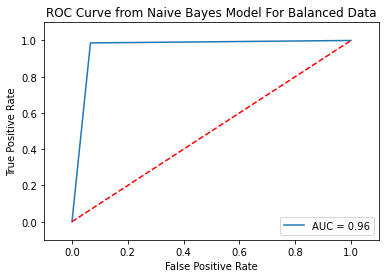

In [33]:
import matplotlib.pyplot as plt
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)

auc_score = metrics.auc(fpr, tpr)

# clear current figure
plt.clf()

plt.title('ROC Curve from Naive Bayes Model For Balanced Data')
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(auc_score))

# it's helpful to add a diagonal to indicate where chance 
# scores lie (i.e. just flipping a coin)
plt.plot([0,1],[0,1],'r--')

plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.legend(loc='lower right')
plt.savefig('results/naive_bayes_roc_balanced.jpg')
plt.show()

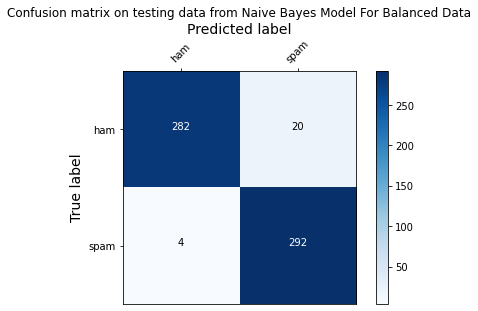

In [34]:
import itertools
import numpy as np
matrix = confusion_matrix(y_test,y_pred)

plt.clf()

# place labels at the top
plt.gca().xaxis.tick_top()
plt.gca().xaxis.set_label_position('top')

# plot the matrix per se
plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)

# plot colorbar to the right
plt.colorbar()

fmt = 'd'

# write the number of predictions in each bucket
thresh = matrix.max() / 2.
for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):

    # if background is dark, use a white number, and vice-versa
    plt.text(j, i, format(matrix[i, j], fmt),
         horizontalalignment="center",
         color="white" if matrix[i, j] > thresh else "black")

class_names = ['ham','spam']
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.tight_layout()
plt.ylabel('True label',size=14)
plt.xlabel('Predicted label',size=14)
plt.title("Confusion matrix on testing data from Naive Bayes Model For Balanced Data")
plt.savefig('results/naive_bayes_confusion_matrix_balanced.jpg')
plt.show()


# Saving model

In [35]:
import pickle
pickle.dump(naive_bayes_classifier, open("models/Naive_Bayes_spam_classification_model_balanced", 'wb'))
 

# Implement k fold cross validation



In [27]:
from sklearn.model_selection import KFold
import numpy as np


In [28]:
Encoder = LabelEncoder()
y = Encoder.fit_transform(data['labels'])
X= data['sms']
X = np.array(X)
kf = KFold(n_splits=10, random_state=4, shuffle=True)


In [30]:
from sklearn.metrics import classification_report

accuracy_list = []
for train_index,test_index in kf.split(X):
    X_train = X[train_index]
    X_test = X[test_index]
    y_train = y[train_index]
    y_test = y[test_index]
    
    Tfidf_vect.fit(X_train)
    
    X_train = Tfidf_vect.transform(X_train)
    X_test = Tfidf_vect.transform(X_test)
    

    naive_bayes_classifier = MultinomialNB(alpha=0.2)
    naive_bayes_classifier.fit(X_train, y_train)
    y_pred = naive_bayes_classifier.predict(X_test)
    
    print(classification_report(y_test, y_pred))
    accuracy = metrics.accuracy_score(y_test, y_pred)
    accuracy_list.append(accuracy)
    print("Accuracy in this fold is",accuracy)
    print('\n')

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       147
           1       0.95      0.97      0.96       152

    accuracy                           0.96       299
   macro avg       0.96      0.96      0.96       299
weighted avg       0.96      0.96      0.96       299

Accuracy in this fold is 0.959866220735786


              precision    recall  f1-score   support

           0       0.96      0.95      0.96       142
           1       0.96      0.97      0.96       157

    accuracy                           0.96       299
   macro avg       0.96      0.96      0.96       299
weighted avg       0.96      0.96      0.96       299

Accuracy in this fold is 0.959866220735786


              precision    recall  f1-score   support

           0       0.96      0.93      0.94       156
           1       0.93      0.96      0.94       143

    accuracy                           0.94       299
   macro avg       0.94      0.94     

In [31]:
accuracy_list = [i*100 for i in accuracy_list]

In [32]:
fold_list = [1,2,3,4,5,6,7,8,9,10]

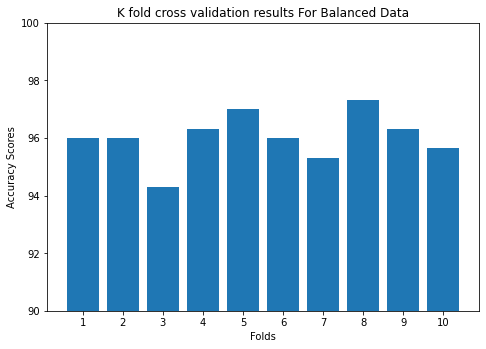

In [33]:
import matplotlib.pyplot as plt
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes = plt.gca()
axes.set_ylim([90,100])
# axes.set_xlim([0,4])
axes.xaxis.set_ticks(np.arange(0, 11, 1))
models = fold_list
accuracy_scores = accuracy_list
axes.bar(models,accuracy_scores)
plt.xlabel('Folds')
plt.ylabel('Accuracy Scores')
plt.title('K fold cross validation results For Balanced Data')
fig.savefig('results/k_fold_cross_validation_result_naive_bayes_balanced.jpg', bbox_inches='tight')

# plt.savefig('results/comparision_chart.png')
plt.show()


In [42]:
 loaded_model = pickle.load(open("models/Naive_Bayes_spam_classification_model_balanced", 'rb'))